In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install tensorflow

In [2]:
df=pd.read_csv('Dataset.csv')
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [4]:
df.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().sum().sort_values(ascending=True)

,0
encounter_id,0
patient_id,0
apache_post_operative,0
pre_icu_los_days,0
icu_id,0
...,...
h1_albumin_max,83824
h1_lactate_max,84369
h1_lactate_min,84369
h1_bilirubin_max,84619


In [6]:
df.hospital_death.value_counts()

,count
hospital_death,
0,83798
1,7915


<Axes: xlabel='hospital_death', ylabel='count'>

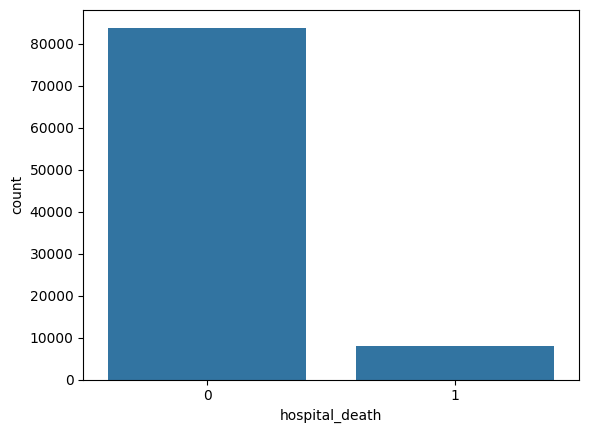

In [7]:
sns.countplot(x='hospital_death',data=df)

**Data Preprocessing and Feature Engineering**

In [8]:
object_columns=df.select_dtypes(include=['object']).columns
columns=df.select_dtypes([np.number]).columns



In [9]:
object_columns=['ethnicity','gender',	'hospital_admit_source','icu_admit_source','icu_stay_type','icu_type','apache_3j_bodysystem','apache_2_bodysystem']
df[columns]=df[columns].fillna(df[columns].mean())

for i in object_columns:
  df[i].fillna(df[i].mode()[0],inplace=True)
  print(i)

df.isnull().sum().sort_values(ascending=True)

ethnicity
gender
hospital_admit_source
icu_admit_source
icu_stay_type
icu_type
apache_3j_bodysystem
apache_2_bodysystem


,0
aids,0
cirrhosis,0
diabetes_mellitus,0
hepatic_failure,0
immunosuppression,0
...,...
icu_stay_type,0
icu_type,0
pre_icu_los_days,0
apache_2_bodysystem,0


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[object_columns]=df[object_columns].apply(le.fit_transform)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(16)
memory usage: 130.1 MB


In [11]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,2,1,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,114252,59342,81,0,77.0,27.420000,0,2,0,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6
2,119783,50777,118,0,25.0,31.950000,0,2,0,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
3,79267,46918,118,0,81.0,22.640000,1,2,0,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,92056,34377,33,0,19.0,29.185818,0,2,1,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,7


In [12]:
df[object_columns]

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,2,1,4,1,0,2,9,0
1,2,0,4,1,0,5,8,6
2,2,0,3,0,0,5,5,3
3,2,0,8,2,0,2,0,0
4,2,1,3,0,0,5,10,7
...,...,...,...,...,...,...,...,...
91708,2,1,0,1,0,3,9,0
91709,2,0,3,1,0,5,9,0
91710,2,1,3,0,0,5,5,3
91711,2,0,3,0,0,5,8,6


In [13]:
#Model building

In [14]:
x=df.drop(columns=['hospital_death'],axis=1)
y=df['hospital_death']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)



In [15]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(73370, 185) (18343, 185) (73370,) (18343,)


In [16]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x_train,y_train)
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns


<Axes: >

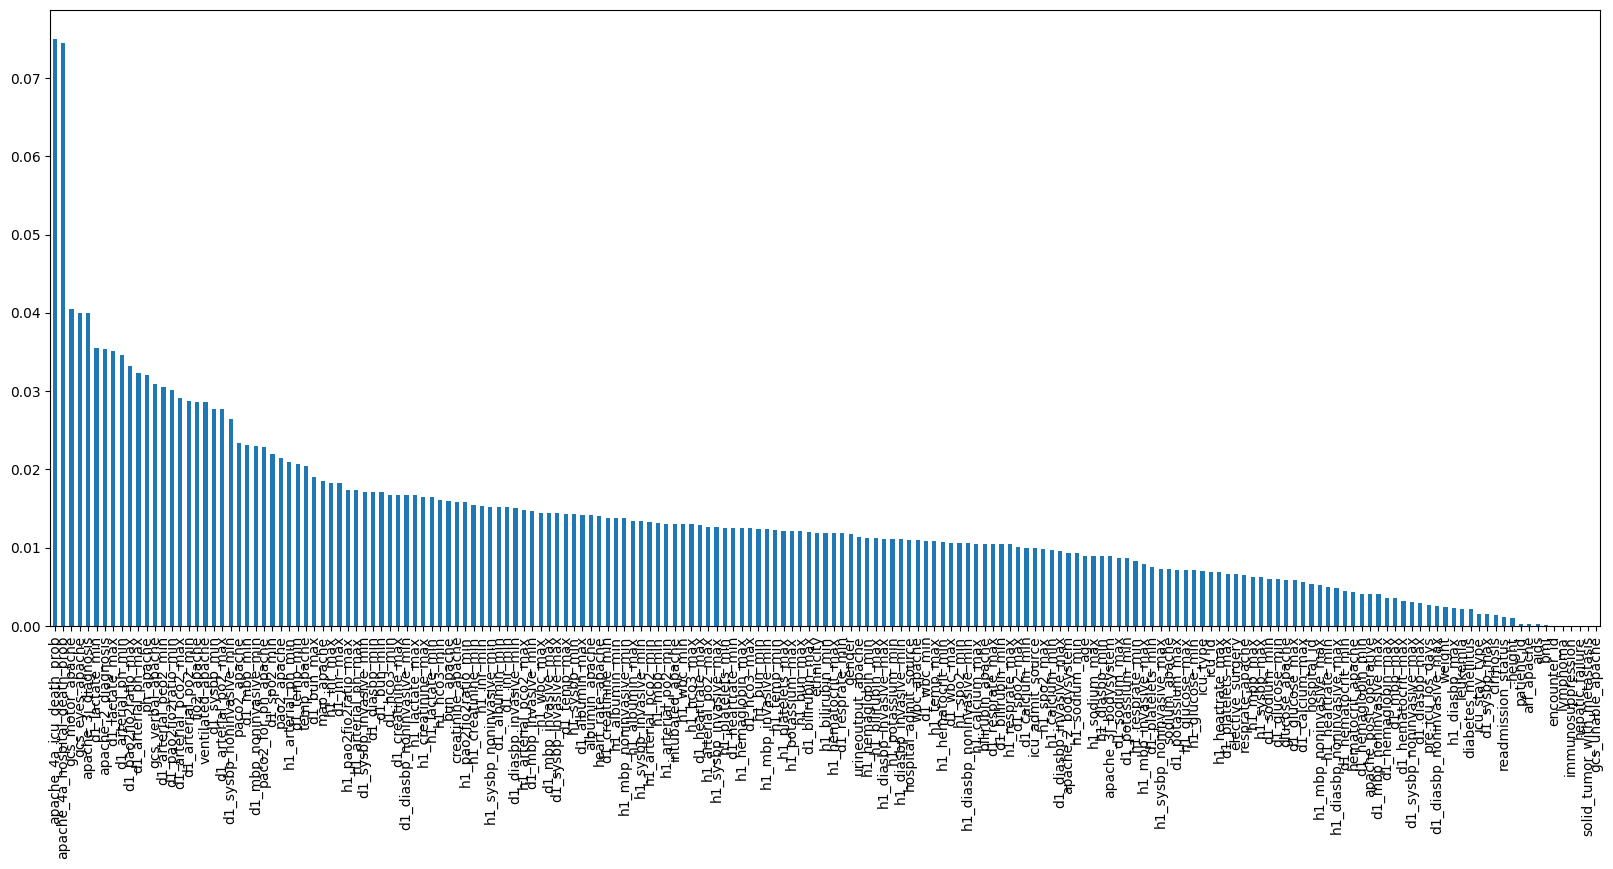

In [17]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [18]:
from sklearn.feature_selection import SelectKBest
select_best=SelectKBest(mutual_info_classif,k=12)
select_best.fit(x_train,y_train)

x_train_final=select_best.transform(x_train)
x_test_final=select_best.transform(x_test)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_std=scaler.fit_transform(x_train_final)
x_test_std=scaler.transform(x_test_final)

In [20]:
#Model training
from keras import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(16, input_dim=12, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

import tensorflow as tf
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
tf.keras.metrics.Recall(name='recall')
]
)

In [21]:
history = model.fit(x_train_std, y_train, epochs=22, validation_split=0.2, batch_size=10)

Epoch 1/22
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9179 - loss: 0.2386 - precision: 0.6319 - recall: 0.2145 - val_accuracy: 0.9220 - val_loss: 0.2235 - val_precision: 0.7500 - val_recall: 0.1401
Epoch 2/22
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9224 - loss: 0.2208 - precision: 0.6551 - recall: 0.2183 - val_accuracy: 0.9230 - val_loss: 0.2164 - val_precision: 0.6501 - val_recall: 0.2280
Epoch 3/22
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9194 - loss: 0.2275 - precision: 0.6689 - recall: 0.2180 - val_accuracy: 0.9214 - val_loss: 0.2227 - val_precision: 0.7778 - val_recall: 0.1219
Epoch 4/22
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9234 - loss: 0.2200 - precision: 0.6728 - recall: 0.2165 - val_accuracy: 0.9182 - val_loss: 0.2302 - val_precision: 0.5362 - val_recall: 0.3690
Epoch 5/22
5870/5870 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9208 - loss: 0.2235 - precision: 0.6665 - recall: 0.2258 - val_accuracy: 0.9239

574/574 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9296 - loss: 0.2007 - precision: 0.8098 - recall: 0.1424
Accuracy: 0.93
Precision: 0.80
Recall: 0.14


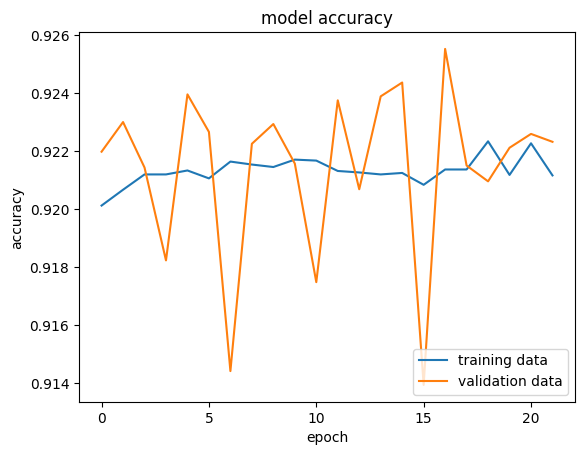

In [22]:
results = model.evaluate(x_test_std, y_test)
print(f"Accuracy: {results[1]:.2f}")
print(f"Precision: {results[2]:.2f}")
print(f"Recall: {results[3]:.2f}")


# Plotting accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')



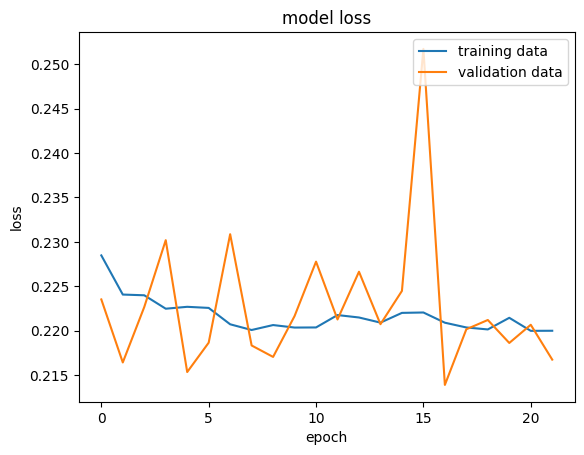

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')

In [24]:
model.save('keras_model.h5')

In [25]:
model.save('my_model.keras')

In [26]:
from keras.models import load_model
model1=load_model('keras_model.h5')

In [28]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 26.4 MB/s eta 0:00:00


In [3]:
import shap
shap.initjs()

X_sample = pd.DataFrame(x_train_final, columns=x_train.columns[select_best.get_support()]).sample(100)
explainer = shap.KernelExplainer(model.predict, x_train_final)
shap_values = explainer.shap_values(X_sample)

# SHAP summary plot
shap.summary_plot(shap_values, X_sample, plot_type="bar")

# Force plot
shap.force_plot(explainer.expected_value[0], shap_values[0], features=X_sample)

# SHAP summary plot for individual features
shap.summary_plot(shap_values[0], features=X_sample)

NameError: name 'x_train_final' is not defined